In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("copper.csv")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df1 = df.copy()

In [4]:
df1.shape

(181673, 14)

In [5]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

# Dealing Data with Wrong format

In [6]:
df1['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df1['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df1['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df1['country'] = pd.to_numeric(df['country'], errors='coerce')
df1['application'] = pd.to_numeric(df['application'], errors='coerce')
df1['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df1['width'] = pd.to_numeric(df['width'], errors='coerce')
df1['material_ref'] = df['material_ref'].str.lstrip('0')
df1['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df1['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df1['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')


# Exploratory data analysis

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [8]:
df1.material_ref.fillna('unknown', inplace=True)
#df1 = df1.dropna()

In [9]:
a = df1['selling_price'] <= 0
print(a.sum())
df1.loc[a, 'selling_price'] = np.nan

a = df1['quantity tons'] <= 0
print(a.sum())
df1.loc[a, 'quantity tons'] = np.nan

a = df1['thickness'] <= 0
print(a.sum())

7
4
0


In [10]:
df1.isna().sum()

id                2
item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [11]:
df.item_date.fillna(df.item_date.mode(), inplace=True) 
df1['quantity tons'].fillna(df1['quantity tons'].mean(), inplace=True)
df1.customer.fillna(df1.customer.mean(), inplace=True)
df1.country.fillna(df1.country.median(), inplace=True)
#df.status.fillna(df.status.mode(), inplace=True)
df1.application.fillna(df1.application.mean(), inplace=True)
df1.thickness.fillna(df1.thickness.mean(), inplace=True)
df1.selling_price.fillna(df1.selling_price.mean(),inplace=True)

In [12]:
df1.isna().sum()

id               2
item_date        3
quantity tons    0
customer         0
country          0
status           2
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    3
selling_price    0
dtype: int64

In [13]:
df1 = df1.dropna()

# Treating outliers

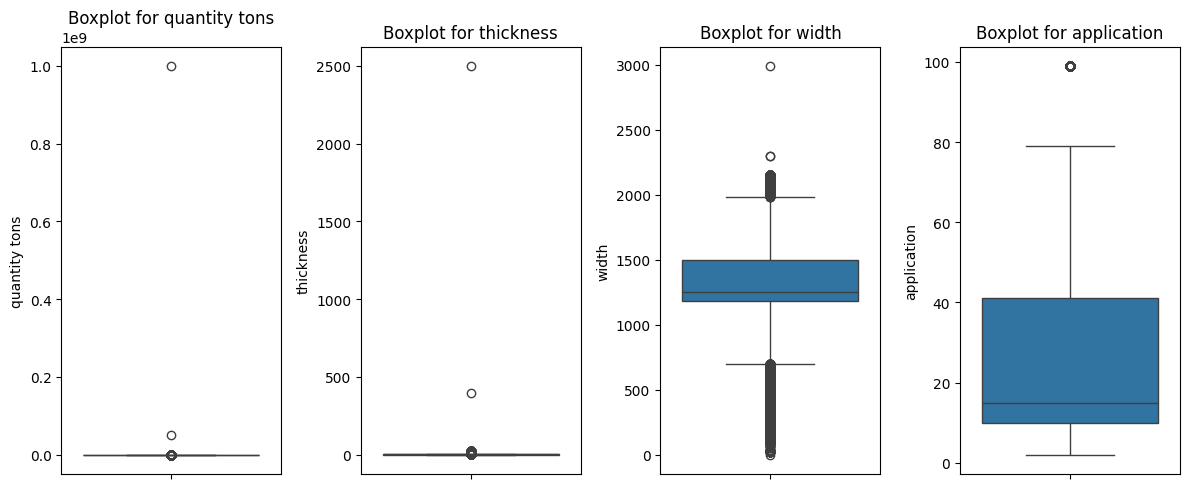

In [14]:
# BEFORE DROPPING OUTLIERS

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))

# Plot for col1
sns.boxplot(df1['quantity tons'], ax=axes[0])
axes[0].set_title(f'Boxplot for {"quantity tons"}')

# Plot for col2
sns.boxplot(df1['thickness'], ax=axes[1])
axes[1].set_title(f'Boxplot for {"thickness"}')

# Plot for col3
sns.boxplot(df1['width'], ax=axes[2])
axes[2].set_title(f'Boxplot for {"width"}')

# Plot for col4
sns.boxplot(df1['application'], ax=axes[3])
axes[3].set_title(f'Boxplot for {"application"}')


# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [15]:
def remove_outliers(df, column_name):
    q1 = df1[column_name].quantile(0.25)
    q3 = df1[column_name].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 * iqr
    high_bound = q3 + 1.5 * iqr
    outliers = (df1[column_name] < low_bound) | (df1[column_name] > high_bound)
    outlier_indices = df1[outliers].index.tolist()
    df1.drop(outlier_indices, inplace = True)
     

In [16]:
remove_outliers(df1, 'application')
remove_outliers(df1, 'width')
remove_outliers(df1, 'thickness')
remove_outliers(df1, 'quantity tons')
     

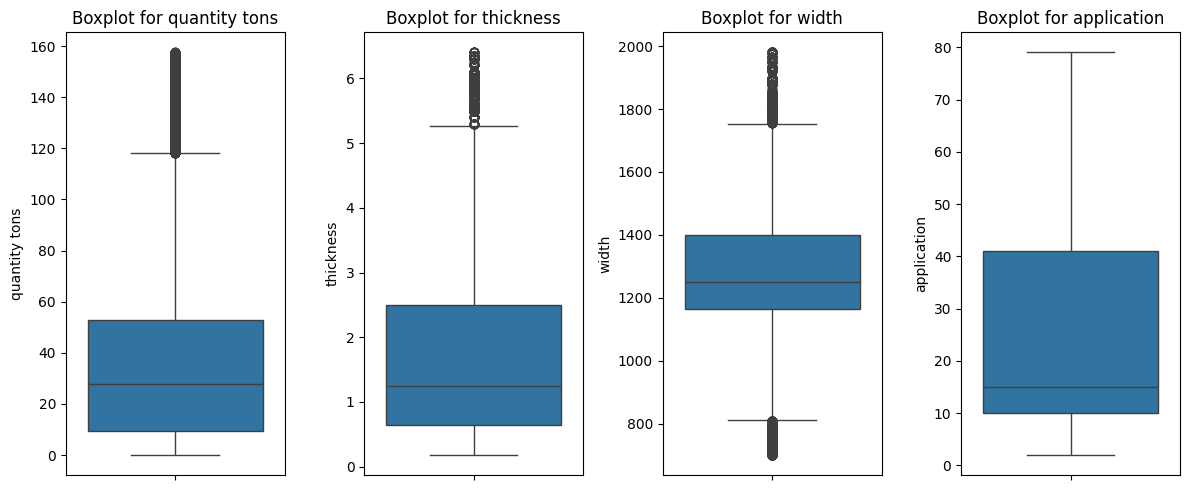

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))


# Plot for col1
sns.boxplot(df1['quantity tons'], ax=axes[0])
axes[0].set_title(f'Boxplot for {"quantity tons"}')

# Plot for col2
sns.boxplot(df1['thickness'], ax=axes[1])
axes[1].set_title(f'Boxplot for {"thickness"}')

# Plot for col3
sns.boxplot(df1['width'], ax=axes[2])
axes[2].set_title(f'Boxplot for {"width"}')

# Plot for col4
sns.boxplot(df1['application'], ax=axes[3])
axes[3].set_title(f'Boxplot for {"application"}')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

# Log transformation

In [18]:
dfr = df1.copy()

Skewness before transformation:
thickness          1.288686
quantity tons      1.377120
selling_price    266.442951
dtype: float64
Skewness after transformation:
thickness_log        0.210490
quantity tons_log   -0.918814
selling_price_log   -5.197768
dtype: float64


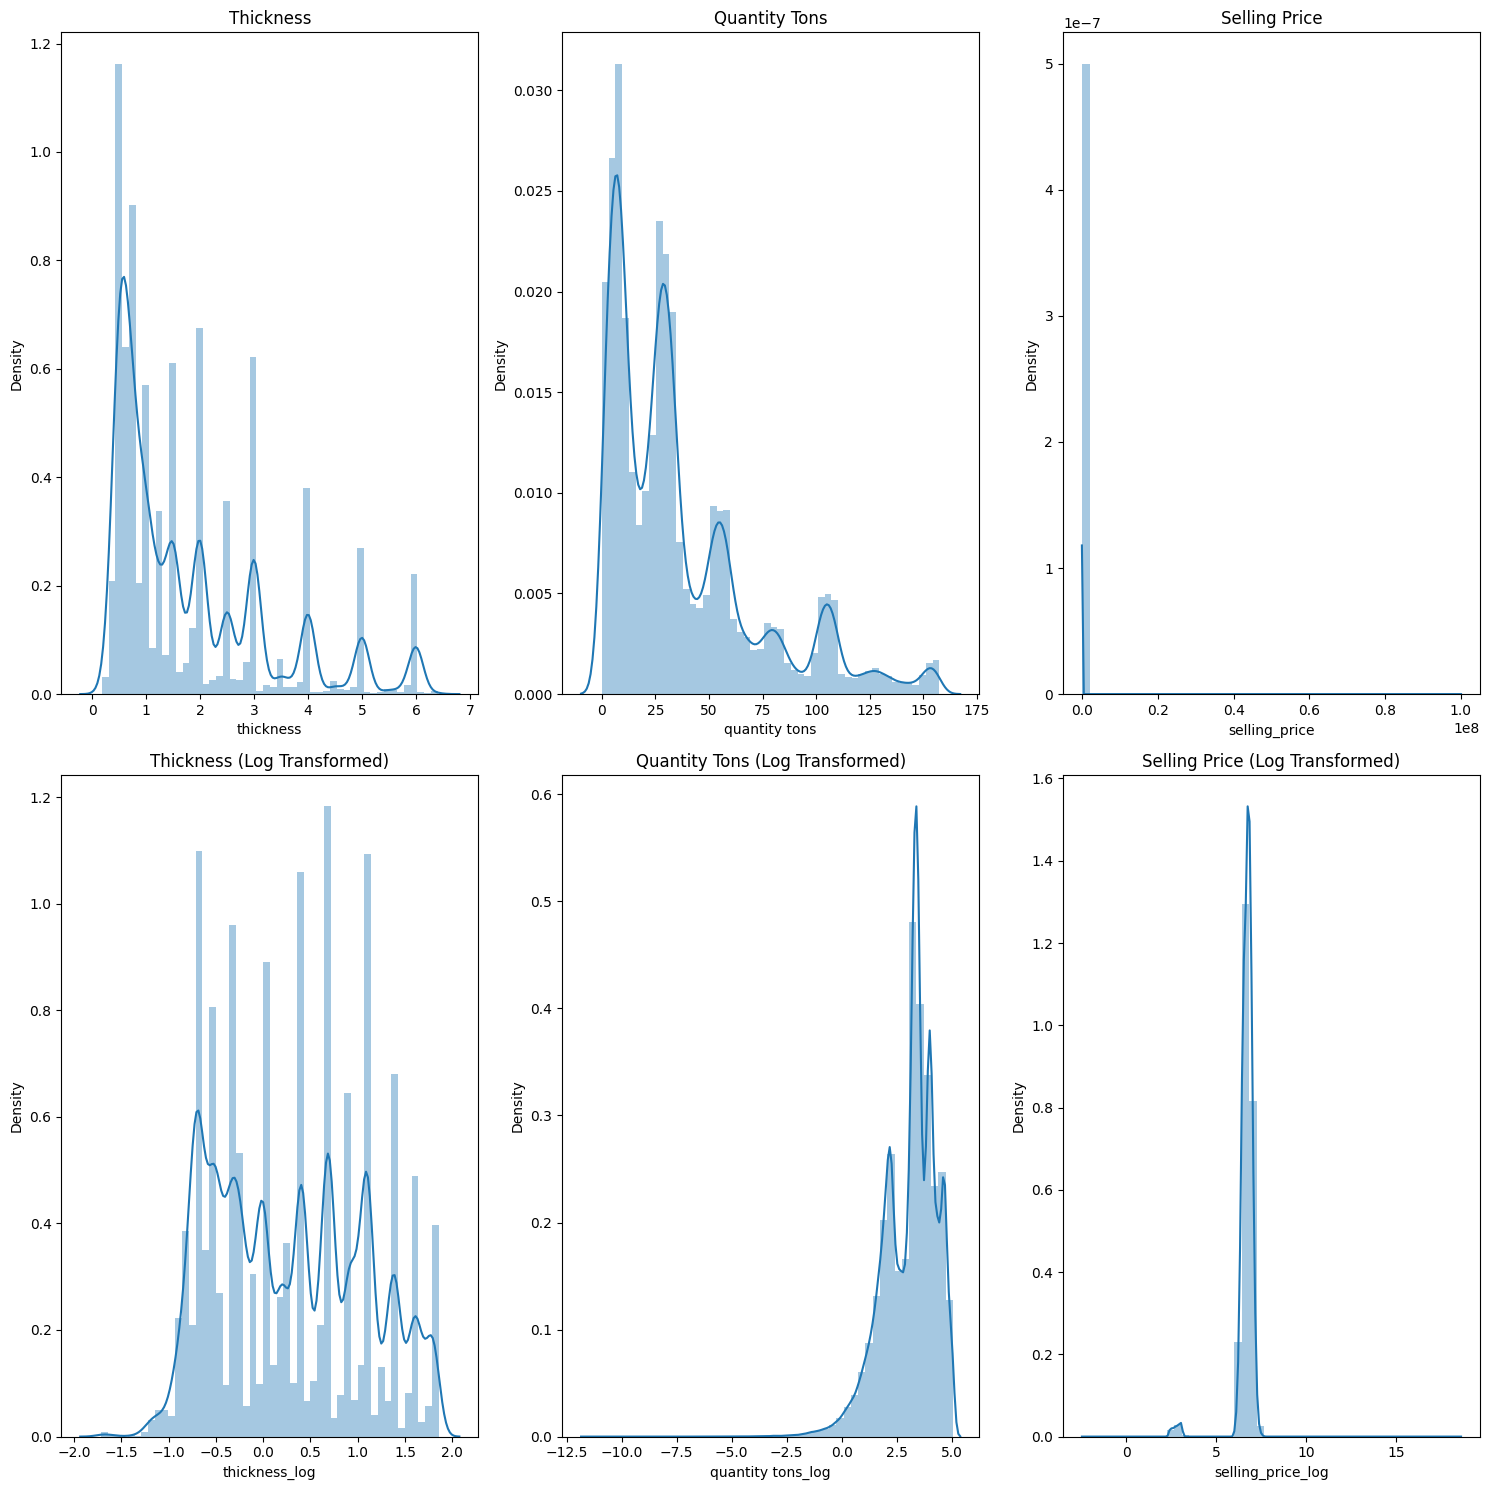

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

skew_before = dfr[['thickness', 'quantity tons', 'selling_price']].skew()
print("Skewness before transformation:")
print(skew_before)

sns.distplot(dfr['thickness'], ax=axes[0, 0])
axes[0, 0].set_title('Thickness')

sns.distplot(dfr['quantity tons'], ax=axes[0, 1])
axes[0, 1].set_title('Quantity Tons')

sns.distplot(dfr['selling_price'], ax=axes[0, 2])
axes[0, 2].set_title('Selling Price')

dfr['thickness_log'] = np.log(dfr['thickness'])
sns.distplot(dfr['thickness_log'], ax=axes[1, 0])
axes[1, 0].set_title('Thickness (Log Transformed)')

dfr['quantity tons_log'] = np.log(dfr['quantity tons'])
sns.distplot(dfr['quantity tons_log'], ax=axes[1, 1])
axes[1, 1].set_title('Quantity Tons (Log Transformed)')

dfr['selling_price_log'] = np.log(dfr['selling_price'])
sns.distplot(dfr['selling_price_log'], ax=axes[1, 2])
axes[1, 2].set_title('Selling Price (Log Transformed)')


skew_after = dfr[['thickness_log', 'quantity tons_log', 'selling_price_log']].skew()
print("Skewness after transformation:")
print(skew_after)

# Adjust layout
plt.tight_layout()

plt.show()

In [20]:
x=dfr[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

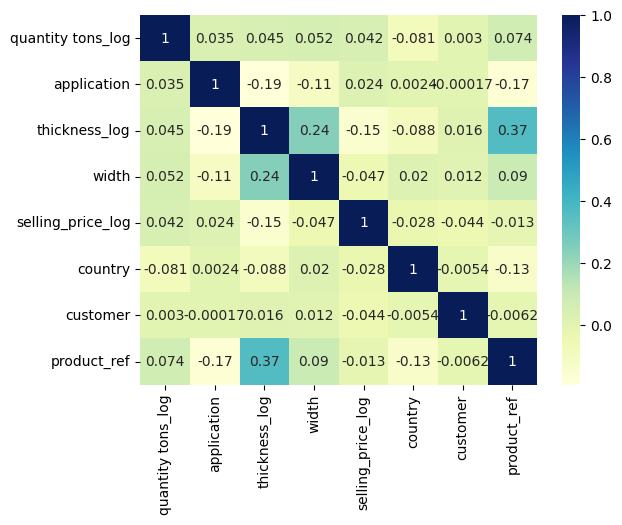

In [21]:
sns.heatmap(x, annot=True, cmap="YlGnBu")

In [22]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [23]:
X=dfr[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=dfr['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
dfr.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'thickness_log',
       'quantity tons_log', 'selling_price_log'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(99390, 22)
(42597, 22)
(99390,)
(42597,)


In [26]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8925434575989745
0.8869227311713694


In [27]:
gbr = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =42)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.780402986358315
0.7741748135518816


In [28]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
print(dtr.score(X_train,y_train))
print(dtr.score(X_test,y_test))

1.0
0.8770800380381112


In [29]:
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.032271737373966755
R-squared: 0.9112974437853401


In [31]:
a = dfr["status"].min()

In [32]:
a

'Draft'

In [33]:
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [639.31506348]


In [34]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('ohe2.pkl', 'wb') as f:
    pickle.dump(ohe2, f)


In [35]:
dfr.shape

(141987, 17)

In [36]:
dfr.status.value_counts()

status
Won                92803
Lost               24377
Not lost for AM    15227
To be approved      3395
Revised             3358
Draft               2764
Offered               52
Offerable             10
Wonderful              1
Name: count, dtype: int64

In [37]:
dfc = dfr.copy()

In [38]:
dfc = dfr[dfr['status'].isin(['Won', 'Lost'])]
len(dfc)

117180

In [39]:
dfc.status.value_counts()

status
Won     92803
Lost    24377
Name: count, dtype: int64

In [40]:
import seaborn as sns

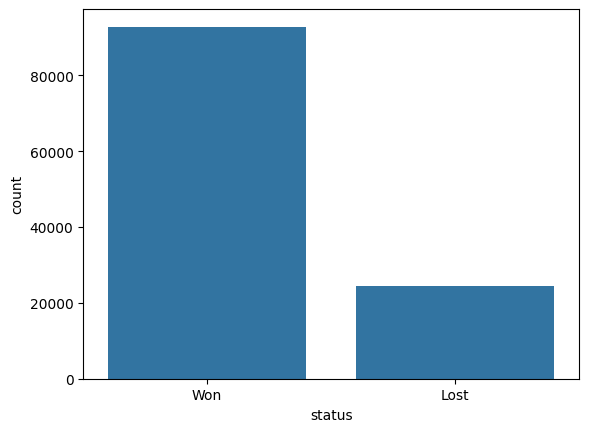

In [41]:
ax = sns.countplot(x ="status",data = dfc)

In [42]:
dfc.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'thickness_log',
       'quantity tons_log', 'selling_price_log'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

In [44]:
Y1 = dfc[['status']]
X1= dfc[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X1[['item type']])
X1_ohe = ohe.fit_transform(X1[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y1) 
y1 = be.fit_transform(Y1)
# independent features after encoding
X1 = np.concatenate((X1[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X1_ohe), axis=1)
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [45]:
y1.shape

(117180, 1)

In [46]:
X1.shape

(117180, 14)

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
smote = SMOTE(random_state=42)

In [49]:
X,y = smote.fit_resample(X1, y1)

In [50]:
X.shape

(185606, 14)

In [51]:
y.shape

(185606,)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(139204, 14)
(46402, 14)
(139204,)
(46402,)


In [53]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier


In [54]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.6892402517169047
0.6852075341580104


In [55]:
xgb_model = XGBClassifier(objective="binary:logistic",random_state=42) 

# Fit the model on the training data
xgb_model.fit(X_train, y_train)
print(xgb_model.score(X_train,y_train))
print(xgb_model.score(X_test,y_test))

0.9219778167294044
0.9123744666178182


In [56]:
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
#y_pred= clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9562087841041335


In [57]:
y_predict = xgb_model.predict(X_test)

In [58]:
y_predict1 = clf.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_predict1)

In [60]:
accuracy

0.9562087841041335

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict1)
cm

array([[22710,   598],
       [ 1434, 21660]], dtype=int64)

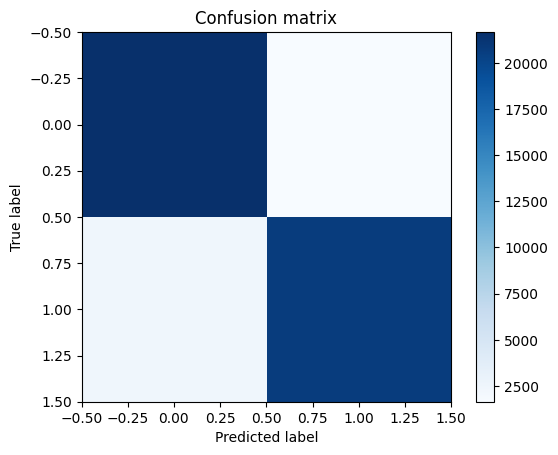

In [62]:
# plot_confusion_matrix(knn, X_test, y_test);

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

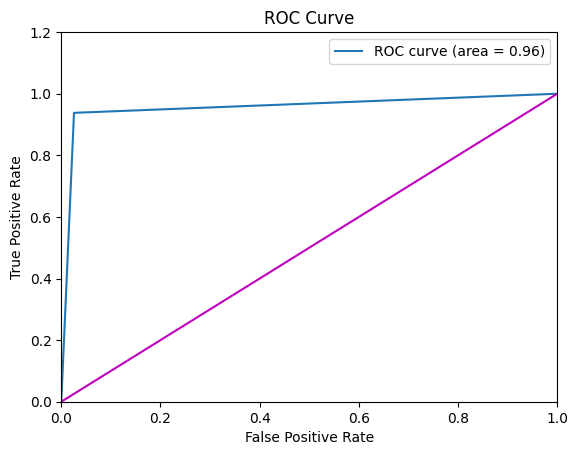

In [63]:
# ROC curve and AUC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predict1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     23308
           1       0.97      0.94      0.96     23094

    accuracy                           0.96     46402
   macro avg       0.96      0.96      0.96     46402
weighted avg       0.96      0.96      0.96     46402



In [65]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = clf.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost


In [66]:
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(clf, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('cohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)